In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sn
%matplotlib inline

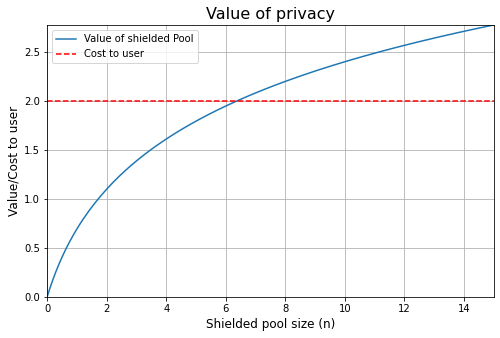

In [2]:
x = np.linspace(0,15,150)
y = np.log(x+1)
cost = 2 * np.ones_like(x)

fig, ax = plt.subplots(figsize = (8,5))
plt.plot(x,y)
plt.plot(x, cost, linestyle = 'dashed', color = 'red')
ax.grid()
ax.set_xlabel('Shielded pool size (n)', fontsize = 12)
ax.set_ylabel(ylabel='Value/Cost to user', fontsize = 12)
ax.set_title('Value of privacy', fontsize =16)
ax.set(xlim = (x.min(), x.max()), ylim = (0, y.max()))
intercept = y >= cost
# ax.fill_between(x, y, cost, where = intercept)
a = plt.legend(["Value of shielded Pool", "Cost to user"])

plt.savefig('privacy_economics.png', format = 'png')


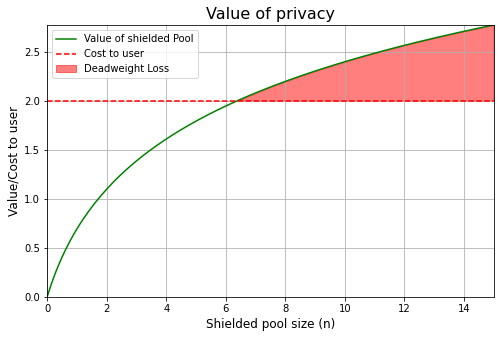

In [37]:
x = np.linspace(0,15,150)
y = np.log(x+1)
cost = 2 * np.ones_like(x)

fig, ax = plt.subplots(figsize = (8,5))
plt.plot(x,y, color = 'green')
plt.plot(x, cost, linestyle = 'dashed', color = 'red')
ax.grid()
ax.set_xlabel('Shielded pool size (n)', fontsize = 12)
ax.set_ylabel(ylabel='Value/Cost to user', fontsize = 12)
ax.set_title('Value of privacy', fontsize =16)
ax.set(xlim = (x.min(), x.max()), ylim = (0, y.max()))
intercept = y >= cost
ax.fill_between(x, y, cost, where = intercept, alpha = 0.5, color = 'red')
a = plt.legend(["Value of shielded Pool", "Cost to user", "Deadweight Loss"])

plt.savefig('privacy_economics_2.png', format = 'png')


$\int_0^a c - log(n+1) dn = ca - (a\log (a+1) - a) = a\big( c - \log (a+1) +1\big)$

In this case, this simplifies to $5(0.8 - \log 6) \approx 1$

In practice, if we subsidise each user by exactly $a\big( c - \log (a+1) +1\big)$, we will be able to eliminate any welfare loss exactly. But this can only be applied up to the point of the intersection. Regardless, if we subsidise each user in some sub-logarithmic fashion, we are guaranteed achieve positive surplus as $n \rightarrow \infty $. Then parameters can be tweaked in order to achieve the correct funding.

An arbitrary but nonetheless sublogarithmic choice could be $\frac{1}{n}$

The corresponding graph would look like

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


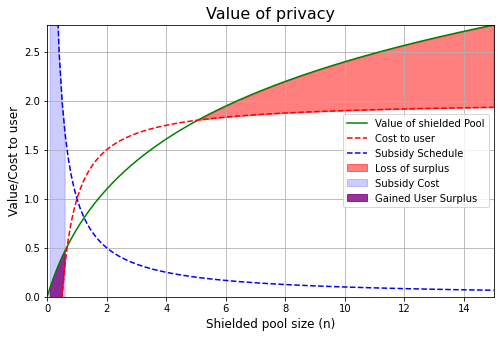

In [31]:
x = np.linspace(0,15,150)
y = np.log(x+1)
cost_c = 2
cost = cost_c * np.ones_like(x) - 1/(x)
subsidy = 1/x

fig, ax = plt.subplots(figsize = (8,5))
plt.plot(x,y, color = 'green')
plt.plot(x, cost, linestyle = 'dashed', color = 'red')
ax.grid()
ax.set_xlabel('Shielded pool size (n)', fontsize = 12)
ax.set_ylabel(ylabel='Value/Cost to user', fontsize = 12)
ax.set_title('Value of privacy', fontsize =16)
ax.set(xlim = (x.min(), x.max()), ylim = (0, y.max()))
low_intercept = (y>= cost) & (y < 1)
top_intercept = (y >= cost) & (y > 1)
ax.fill_between(x, y, cost, where = top_intercept, alpha = 0.5, color = 'red')
ax.fill_between(x,subsidy, where = low_intercept, alpha = 0.2, color = 'blue')
ax.fill_between(x,y, cost, where = low_intercept, alpha = 0.8, color = 'purple')
plt.plot(x, subsidy, linestyle = '--', color = 'blue')

a = plt.legend(["Value of shielded Pool", "Cost to user", "Subsidy Schedule", "Loss of surplus", "Subsidy Cost", "Gained User Surplus"])

plt.savefig('privacy_economics_3.png', format = 'png')


The subsidy is not sufficient in this case, and must be scaled. It can be shown that the subsidy is always sufficient when scaled by the constant cost to the user of entering the privacy set. Hence the subsidy $c* \frac{1}{n}$ indeed solves the problem at hand. The total funding would be fixed at exactly the cost to any single user.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


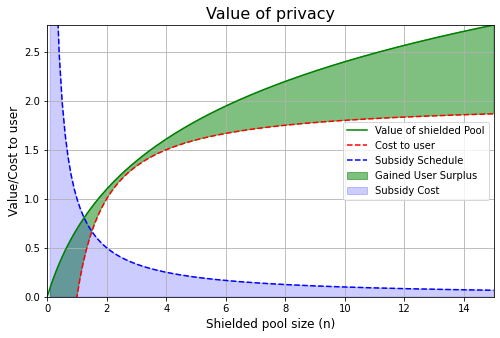

In [35]:
x = np.linspace(0,15,150)
y = np.log(x+1)
cost_c = 2
cost = cost_c * np.ones_like(x) - cost_c/(x)

fig, ax = plt.subplots(figsize = (8,5))
plt.plot(x,y, color = 'green')
plt.plot(x, cost, linestyle = 'dashed', color = 'red')
ax.grid()
ax.set_xlabel('Shielded pool size (n)', fontsize = 12)
ax.set_ylabel(ylabel='Value/Cost to user', fontsize = 12)
ax.set_title('Value of privacy', fontsize =16)
ax.set(xlim = (x.min(), x.max()), ylim = (0, y.max()))
top_intercept = (y >= cost) & (y > 1)
ax.fill_between(x, y, cost, alpha = 0.5, color = 'green')
ax.fill_between(x,subsidy, alpha = 0.2, color = 'blue')
plt.plot(x, subsidy, linestyle = '--', color = 'blue')

a = plt.legend(["Value of shielded Pool", "Cost to user", "Subsidy Schedule", "Gained User Surplus", "Subsidy Cost"])


plt.savefig('privacy_economics_sol.png', format = 'png')

The exact (minimum funding) solution is given below

$\frac{\partial}{\partial x} \ln(x+1) = -\frac{\partial}{\partial x}\frac{k}{x} \Leftrightarrow x^2 -kx - k = 0 $

Now the minimum point is given by $ \ln(x+1) - c + \frac{k}{x} = 0$
